# Electron-Phonon Couplings

All parameters for EPC calculations can be specified under `EPCs = {}` block in dftbephy_in.hsd. According to the position of the band edge, k-vector shift `kvec0` should be defined. We chose a k-vector corresponding to 0.1 eV above the Fermi energy for graphene.

```
    EPCs {
        kvec0 = -0.64566667 -0.32283333 0.0
        ##### only for EPC calc. on mesh ######
        qpoints = Mesh {
            npoints = 200 200 1
            refinement = 10
        }
#        bands = 3 4
        velocities = no
        #######################################
    }
```

Additionally, one can select the bands to be included in the calculation by the `bands` tag. Moreover, the velocities $\vec{v}_n(\vec{k})$ can be calculated by setting `velocities=yes` in `EPCs = {}` block.

For EPC calculations, we need [dftbephy-epc.py](https://github.com/CoMeT4MatSci/dftbephy/blob/master/scripts/dftbephy-epc.py) script, which can be executed as follows.
```
python dftbephy-epc.py 
```
Once the calculation is done, the EPC elements will be saved in `el-ph-Nq200-K-bandsel.hdf5`. [`Graphene-EPC.ipynb`](https://github.com/CoMeT4MatSci/dftbephy/blob/master/notebooks/Graphene-EPC.ipynb) can be used for plotting EPC contour plots:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import h5py
import json

def colorbar(mappable, ax=plt.gca()):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    last_axes = plt.gca()
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

In [2]:
hbar_amu_THz = 6.35 # Å^2
THz__eV = 4.136e-3

In [3]:
basedir='./'

# EPCs at k-point

In [5]:
with h5py.File(basedir +'../el-ph/el-ph-Nq200-K-bandsel.hdf5', 'r') as f:
    mesh_qpoints = f['ph']['qpoints'][()]
    qvecs = f['ph']['qpointsCart'][()]
    mesh_frequencies = f['ph']['omega'][()] / THz__eV 
    mesh_epskq = f['el']['eps_q_0'][()]
    mesh_g2 = f['el-ph']['g2_0'][:,:,3:5,3:5] # only read CB and VB
    Kvec = f['el-ph']['g2_0'].attrs['kvec']

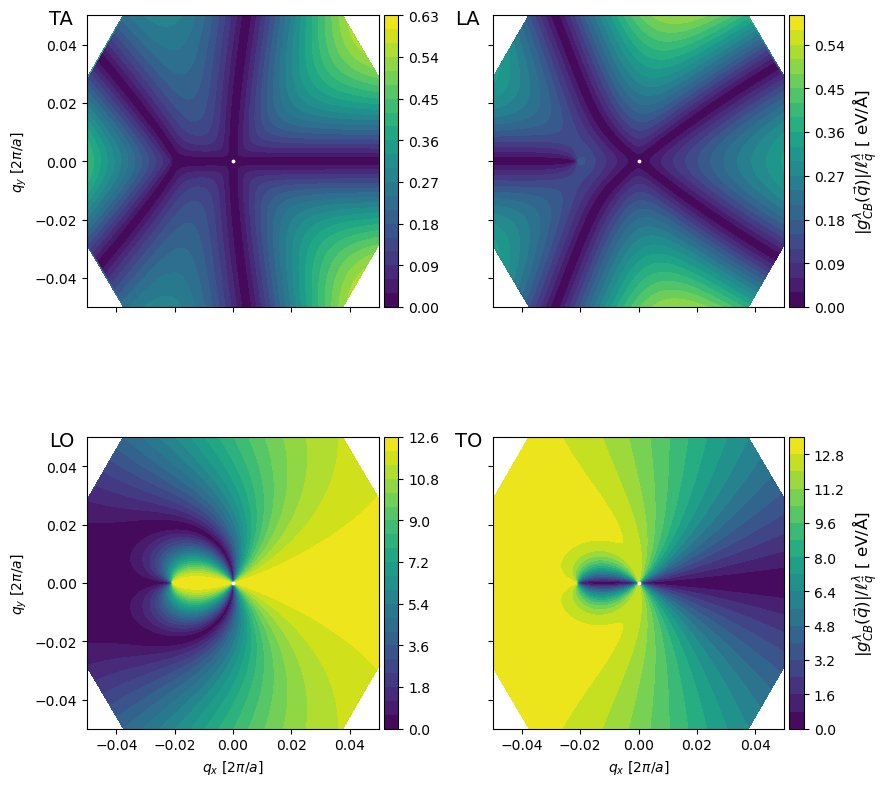

In [6]:
mC = 12.010700
qx = qvecs[:,0]
qy = qvecs[:,1]
q_unit = 1.

fig, axs = plt.subplots(2, 2, figsize=(3*3, 3*3), sharex='col', sharey='row')

ax = axs[0,0]
lq = (hbar_amu_THz/(2*mC*mesh_frequencies[:,1]))
im = ax.tricontourf(qx/q_unit, qy/q_unit, np.sqrt(mesh_g2[:, 1, 1, 1]/lq), levels=20)
ax.scatter(0.0, 0.0, color='white', s=3)

ax.set_aspect('equal')
colorbar(im, ax=ax)
ax.text(-0.063, 0.047, 'TA', fontsize=14)
ax.set_xlim((-0.05,0.05))
ax.set_ylim((-0.05,0.05))

ax = axs[0,1]
lq = (hbar_amu_THz/(2*mC*mesh_frequencies[:,2]))
im = ax.tricontourf(qx/q_unit, qy/q_unit, np.sqrt(mesh_g2[:, 2, 1, 1]/lq), levels=20)
ax.scatter(0.0, 0.0, color='white', s=3)

ax.set_aspect('equal')
cbar = colorbar(im, ax=ax)
cbar.set_label(r'$|g^\lambda_{CB}(\vec{q})| / \ell^\lambda_{\vec{q}}$ [ eV/Å]', fontsize=12)
ax.text(-0.063, 0.047, 'LA', fontsize=14)
ax.set_xlim((-0.05,0.05))
ax.set_ylim((-0.05,0.05))

ax = axs[1,0]
lq = (hbar_amu_THz/(2*mC*mesh_frequencies[:,4]))
im = ax.tricontourf(qx/q_unit, qy/q_unit, np.sqrt(mesh_g2[:, 4, 1, 1]/lq), levels=20)
ax.scatter(0.0, 0.0, color='white', s=3)

ax.set_aspect('equal')
colorbar(im, ax=ax)
ax.text(-0.063, 0.047, 'LO', fontsize=14)
ax.set_xlim((-0.05,0.05))
ax.set_ylim((-0.05,0.05))

ax = axs[1,1]
lq = (hbar_amu_THz/(2*mC*mesh_frequencies[:,5]))
im = ax.tricontourf(qx/q_unit, qy/q_unit, np.sqrt(mesh_g2[:, 5, 1, 1]/lq), levels=20)
ax.scatter(0.0, 0.0, color='white', s=3)

ax.set_aspect('equal')
cbar = colorbar(im, ax=ax)
cbar.set_label(r'$|g^\lambda_{CB}(\vec{q})| / \ell^\lambda_{\vec{q}}$ [ eV/Å]', fontsize=12)
ax.text(-0.063, 0.047, 'TO', fontsize=14)
ax.set_xlim((-0.05,0.05))
ax.set_ylim((-0.05,0.05))

plt.setp(axs[-1, :], xlabel=r'$q_x$ [$2\pi/a$]')
plt.setp(axs[:, 0],  ylabel=r'$q_y$ [$2\pi/a$]')

plt.tight_layout()
plt.show()
#plt.savefig(basedir +'../Figures/graphene-elph_Mmatrix.png')

# EPCs along band-path

EPC matrix elements can be calculated along a given band path using [dftbephy-ephline.py](https://github.com/CoMeT4MatSci/dftbephy/blob/master/scripts/dftbephy-ephline.py) by updating `EPC{}` block in the input. Here, we specify the high-symmetry k-points, their labels, and number of points between each consecutive high-symmetry points in the same way as for the band-structure calculation.

```
    EPCs {
        kvec0 = -0.64566667 -0.32283333 0.0
        ##### only for EPC calc. on mesh ######
        qpoints = Mesh {
            npoints = 200 200 1
            refinement = 10
        }
#        bands = 3 4
        velocities = no
        #######################################

        #### only for EPC calc. along path ####
        path = {
             0.0        0.0       0.0
            -0.5       -0.5       0.0
            -0.666667  -0.333333  0.0
             0.0        0.0       0.0
        }
        labels = { G M K G }
        npoints = 51
        ########################################
    }

```    

In [7]:
with open(basedir +'../el-ph/ephline.json') as jfile:
    data = json.load(jfile)
data = json.loads(data)

indices = np.array(data['highSymIndices'])
indices = indices-1
indices[0] = 0
labels = data['highSymLabels']
qpoints = np.array(data['wavevectorCoordinatesCart'])
energies = np.array(data['energies'])
frequencies = np.array(data['frequencies'])
eigenvectors = np.array(data['eigenvectors_real']) + 1j*np.array(data['eigenvectors_imaginary'])
epcs = np.array(data['epcs'])
data['numBands']

q_dist_dftb = [0.,]
for i in range(1, qpoints.shape[0]):
    q_dist_dftb.append(np.linalg.norm(qpoints[i,:]-qpoints[i-1,:]))

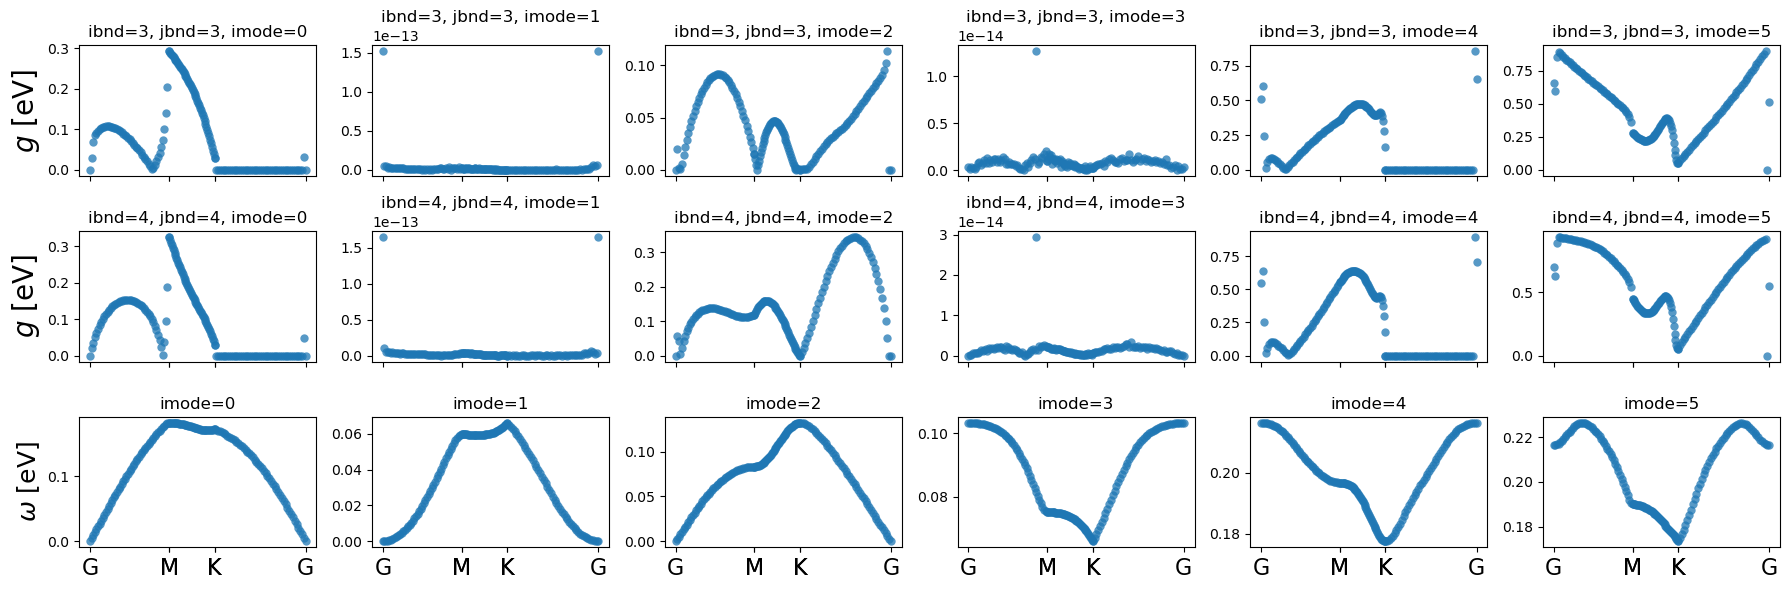

In [8]:
nb = 3 # start with VB

fig, axs = plt.subplots(3, 6, figsize=(3*6, 2*3), sharex='col')

for b in range(2):
    for m in range(6):
        ax1 = axs[b,m]
        ax1.scatter(np.cumsum(q_dist_dftb), epcs[:,m,nb+b,nb+b], 
                         marker='o', linewidth=0, alpha=0.75, zorder=2)
        
        ax1.set_xticks(np.cumsum(q_dist_dftb)[indices])
        ax1.set_xticklabels(labels)
        ax1.set_title(r'ibnd=%i, jbnd=%i, imode=%i' % (nb+b, nb+b, m))
        
axs[0,0].set_ylabel(r'$g$ [eV]', fontsize=20)
axs[1,0].set_ylabel(r'$g$ [eV]', fontsize=20)


for m in range(6):
    ax1 = axs[2,m]
    ax1.scatter(np.cumsum(q_dist_dftb), frequencies[:, m], 
                     marker='o', linewidth=0, alpha=0.75, zorder=2)    

    ax1.set_xticks(np.cumsum(q_dist_dftb)[indices])
    ax1.set_xticklabels(labels, fontsize=16)
    ax1.set_title(r'imode=%i' % (m))

axs[2,0].set_ylabel(r'$\omega$ [eV]', fontsize=18)


plt.tight_layout()
plt.show()
#plt.savefig(basedir +'../Figures/graphene-elph_bandpath.png')

This figure is arranged as a **3 × 6** grid of subplots, where the **columns** correspond to the **phonon mode index** (six modes in graphene), and the **rows** show different quantities:

- **Row 1:**  EPC matrix elements $g$ for the first selected electronic band (`nb`, here the valence band).  

- **Row 2:** EPC matrix elements $g$ for `nb+1`, here the conduction band. 

- **Row 3:** Phonon dispersion $\omega(q)$. Each panel shows the phonon frequency for the corresponding mode.